# KNN Model Training for Emotion Detection through Facial Recognition
This is the training module for detecting Emotions through Facial Recognition using K-Nearest Neighbors Algorithm.
It uses the generated dataset **model_training.csv** that was generated from the data processing module.


## Libraries

First, we have to import the necessary libraries.

In [1]:
#ignore FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


## Importing and Splitting the datasets

In [2]:
#importing the datasets
train_set = pd.read_csv('./outputs/train_set.csv')
test_set = pd.read_csv('./outputs/test_set.csv')

In [3]:
#Split into features and target; x = features, y = target
x_train = train_set.iloc[:, 1:]
y_train = train_set['label']

x_test = test_set.iloc[:, 1:]
y_test = test_set['label']

#combining test and train set for cross validation
x = pd.concat([x_train, x_test])
y = pd.concat([y_train, y_test])

## Training the model

We then train the KNN model using the training dataset with the number of neighbors as 3.

In [4]:
#Training the model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Testing the model

After training, we can then test and evaluate the model through cross validation and using the test set

In [5]:
y_cross_scores = cross_val_score(knn, x, y, cv=5, scoring = 'accuracy')
print("%0.2f%% accuracy with a standard deviation of %0.2f%%" % (y_cross_scores.mean()*100, y_cross_scores.std()*100))

61.25% accuracy with a standard deviation of 4.09%


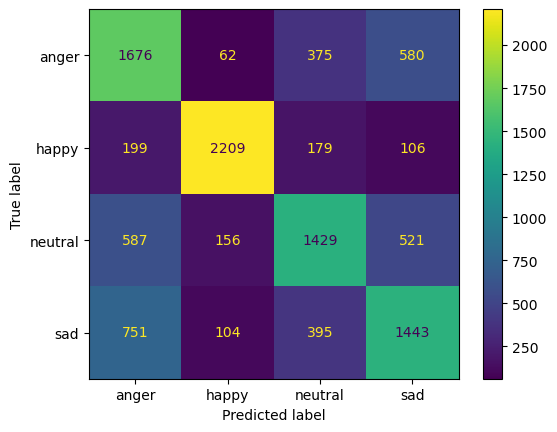

In [6]:
y_cross_predict = cross_val_predict(knn, x_train, y_train, cv = 5) 
y_cross_cm = confusion_matrix(y_train, y_cross_predict)
y_cross_display = ConfusionMatrixDisplay(confusion_matrix=y_cross_cm, display_labels=knn.classes_)
y_cross_display.plot()

In [7]:
y_pred = knn.predict(x_test)

In [8]:
print("The mean accuracy of the given test data and labels is: %0.2f%%" %(knn.score(x_test, y_test) * 100))


The mean accuracy of the given test data and labels is: 54.33%


In [9]:
y_pred_accuracy = accuracy_score(y_test, y_pred)
y_pred_precision = precision_score(y_test, y_pred, average='macro')
y_pred_recall = recall_score(y_test, y_pred, average='macro')
y_pred_f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: ", y_pred_accuracy*100)
print("Precision: ", y_pred_precision*100)
print("Recall: ", y_pred_recall*100)
print("F1: ", y_pred_f1*100)


Accuracy:  54.326241134751776
Precision:  51.30822245032945
Recall:  50.633231350547106
F1:  50.80498175640046


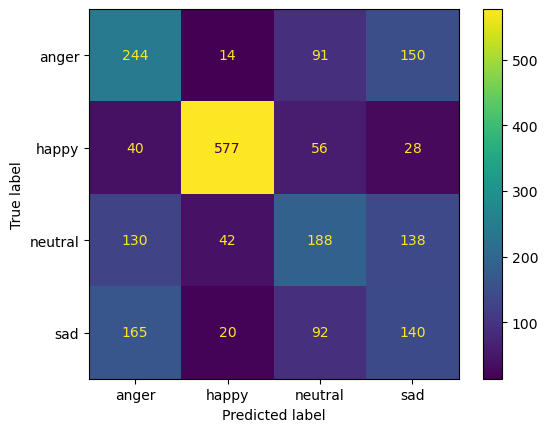

In [11]:
y_pred_cm = confusion_matrix(y_test, y_pred)
y_pred_display = ConfusionMatrixDisplay(confusion_matrix=y_pred_cm, display_labels=knn.classes_)
y_pred_display.plot()

# Hyperparameter Tuning

In [12]:
def knn_model(x_train, y_train, x_test, y_test, n_neighbors):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train, y_train)

    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    return accuracy, precision, recall, f1

f1 = list()
accuracy = list()
precision = list()
recall = list()

x = range(1, 51)

for i in x:
    results = knn_model(x_train, y_train, x_test, y_test, i)
    accuracy.append(results[0])
    precision.append(results[1])
    recall.append(results[2])
    f1.append(results[3])

# Prepare the data
x = range(1, 51)
y_f1 = f1
y_accuracy = accuracy
y_precision = precision
y_recall = recall


KeyboardInterrupt: 

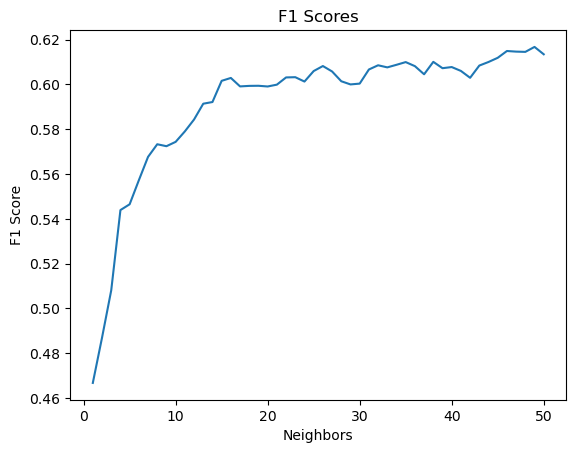

In [ ]:
# Plot the F1 scores
plt.plot(x, y_f1)
plt.xlabel('Neighbors')
plt.ylabel('F1 Score')
plt.title('F1 Scores')
plt.show()

In [13]:
highest_f1_index = np.argmax(f1)
print("The highest F1 score is: ", f1[highest_f1_index] * 100, "% with ", highest_f1_index+1, " neighbors")


The highest F1 score is:  60.85812495683894 % with  32  neighbors


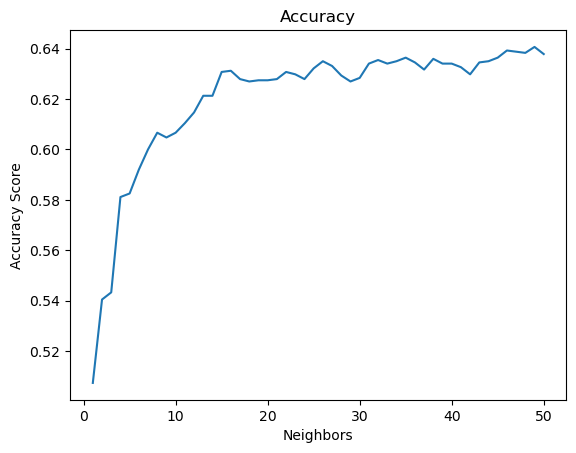

In [ ]:
# Plot the accuracy scores
plt.plot(x, y_accuracy)
plt.xlabel('Neighbors')
plt.ylabel('Accuracy Score')
plt.title('Accuracy')
plt.show()

In [14]:
highest_accuracy_index = np.argmax(accuracy)
print("The highest accuracy score is: ", accuracy[highest_accuracy_index] * 100, "% with ", highest_accuracy_index+1, " neighbors")

The highest accuracy score is:  63.54609929078015 % with  32  neighbors


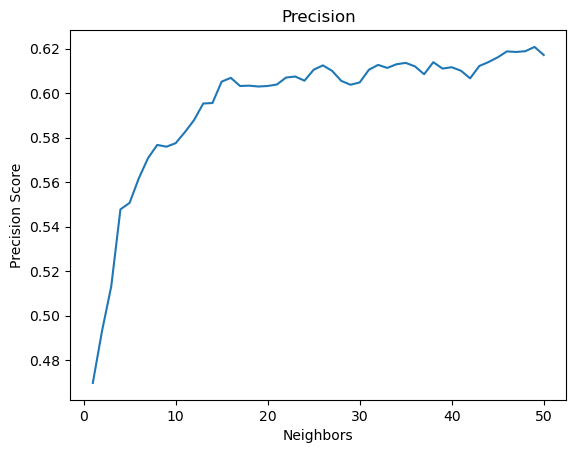

In [38]:
#Plot the precision scores
plt.plot(x, y_precision)
plt.xlabel('Neighbors')
plt.ylabel('Precision Score')
plt.title('Precision')
plt.show()

In [15]:
highest_precision_index = np.argmax(precision)
print("The highest precision score is: ", precision[highest_precision_index]*100, "% with ", highest_precision_index+1, " neighbors")

The highest precision score is:  61.26449483590287 % with  32  neighbors


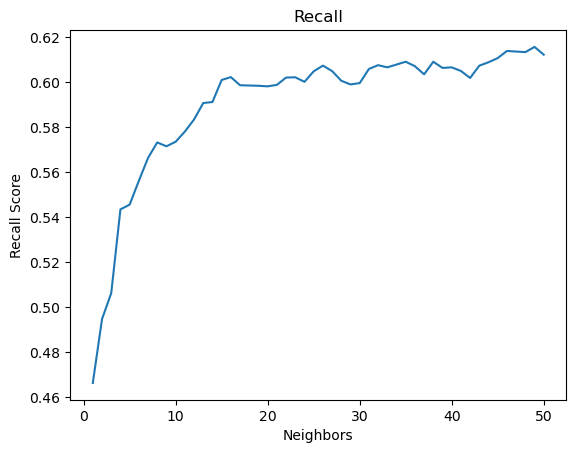

In [40]:
#Plot the recall scores
plt.plot(x, y_recall)
plt.xlabel('Neighbors')
plt.ylabel('Recall Score')
plt.title('Recall')
plt.show()

In [16]:
highest_recall_index = np.argmax(recall)
print("The highest recall score is: ", recall[highest_recall_index]*100, "% with ", highest_recall_index+1, " neighbors")

The highest recall score is:  60.75967952545055 % with  32  neighbors
